# John Grahn C964 Computer Science Capstone


## Directory Creation and Organizing of Data for Model Testing

The code below is used to create directories and organize data to test the Convolutional Neural Network model for this project.

In [ ]:
from os import listdir, makedirs
from shutil import copyfile
from random import seed
from random import random
# create directories
data_location = 'data_dogs_or_cats_training/'
child_directory = ['train/', 'test/']
for child_dir in child_directory:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		directory_new = data_location + child_dir + labldir
		makedirs(directory_new, exist_ok=True)
# Generates random number
seed(1)
# Ratio of images for validation
validation_ratio = 0.25
# Move training data images into child directories
source_directory = 'train/'
for image in listdir(source_directory):
	source = source_directory + '/' + image
	destination_directory = 'train/'
	if random() < validation_ratio:
		destination_directory = 'test/'
	if image.startswith('cat'):
		destination = data_location + destination_directory + 'cats/' + image
		copyfile(source, destination)
	elif image.startswith('dog'):
		destination = data_location + destination_directory + 'dogs/' + image
		copyfile(source, destination)


# Code for Model Testing
The code below runs the CNN model and graphs performance on a line plot and confusion matrix.

In [ ]:
import sys
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix


# CNN Model
def animal_classification_model():
    # Load VGG16 CNN Model
    animal_classification = VGG16(include_top=False, input_shape=(224, 224, 3))
    # Mark layers untrainable
    for layer in animal_classification.layers:
        layer.trainable = False
    # Create classifier layers
    flatten1 = Flatten()(animal_classification.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flatten1)
    output = Dense(1, activation='sigmoid')(class1)
    # Define model
    animal_classification = Model(inputs=animal_classification.inputs, outputs=output)
    # Compile animal_classification_model
    optimizer = SGD(learning_rate=0.001, momentum=0.9)
    animal_classification.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return animal_classification


# Classifcation Accuracy
def performance_graphing(history, y_test, y_pred):
    # Classification Accuracy Plot
    plt.subplot(211)
    plt.title('Image Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.legend(['train', 'test'], loc='upper left')
    # Confusion matrix plot
    plt.subplot(212)
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0,1], ['Cat', 'Dog'])
    plt.yticks([0,1], ['Cat', 'Dog'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    # Show Plot and save to file
    plt.savefig('performance_plots.png')
    plt.show()
    plt.close()


# Test Framework for evaulting model
def testing_framework():
    # define model
    animal_classification = animal_classification_model()
    # Create new generator
    generator = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    generator.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    iterator_train = generator.flow_from_directory('data_dogs_or_cats_training/train/',
                                             class_mode='binary', batch_size=64, target_size=(224, 224))
    iterator_test = generator.flow_from_directory('data_dogs_or_cats_training/test/',
                                            class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = animal_classification.fit(iterator_train, steps_per_epoch=len(iterator_train),
                                        validation_data=iterator_test, validation_steps=len(iterator_test), epochs=5,
                                        verbose=1)
    # evaluate model
    y_pred = animal_classification.predict(iterator_test, steps=len(iterator_test))
    y_pred = y_pred > 0.5
    y_test = iterator_test.labels
    _, acc = animal_classification.evaluate(iterator_test, steps=len(iterator_test), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves and confusion matrix plot
    performance_graphing(history, y_test, y_pred)

testing_framework()

<img src="https://lh3.googleusercontent.com/drive-viewer/AFGJ81rUmg4UOGTIYvrG-MAXhxaDUv-n0hfu_BRVTyKllMG71GGCi9JqnXXn7-evQX4gsdP2MM0Fhg35dTHluvhCxNGmjHbd0g=s2560" /> </a>
<img src="https://lh3.googleusercontent.com/drive-viewer/AFGJ81oiTxz8yfn1sYTmNbhYeKT2jgKp3FbY8zmkLdRdHBJYnVRAxRVnaFAQSB4eHo9p-AOdY3BgK-gDF9TSfS14hK6rkgIrCw=s2560" /> </a>

# Final Model Directory Creation
The code below creates directories for the final model.

In [ ]:
from os import makedirs, listdir
from shutil import copyfile
# Create new directories
data_location = 'dogs_or_cats_final_model/'
# create label subdirectories
labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
    directory_new = data_location + labldir
    makedirs(directory_new, exist_ok=True)
# copy training dataset images into subdirectories
source_directory = 'train/'
for image in listdir(source_directory):
    source = source_directory + '/' + image
    if image.startswith('cat'):
        destination = data_location + 'cats/' + image
        copyfile(source, destination)
    elif image.startswith('dog'):
        destination = data_location + 'dogs/' + image
        copyfile(source, destination)

# Bar Chart of Final Training Data
The code below creates a bar graph to demonstrate the data on which the final model will be trained.

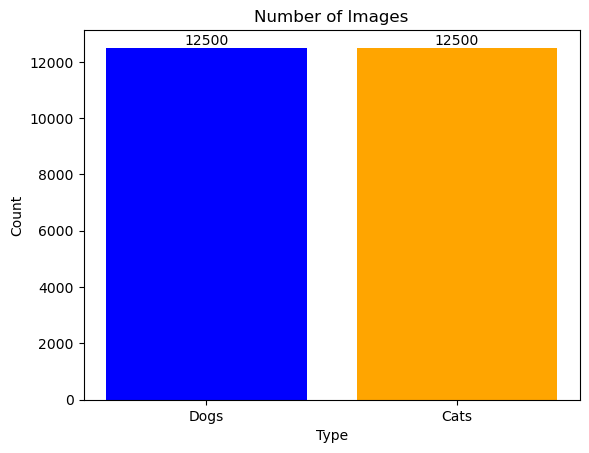

In [ ]:
import os
import matplotlib.pyplot as plt

# Set up variables to store the number of images in each folder
number_of_dogs = 0
number_of_cats = 0

# Loop through the "dogs" folder and count the number of images
for image_name in os.listdir("dogs_or_cats_final_model/dogs"):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):
        number_of_dogs += 1

# Loop through the "cats" folder and count the number of images
for image_name in os.listdir("dogs_or_cats_final_model/cats"):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):
        number_of_cats += 1

# Set up the colors for the bars
colors = ["blue", "orange"]

# Create a bar graph showing the number of images in each folder
labels = ["Dogs", "Cats"]
data = [number_of_dogs, number_of_cats]
plt.bar(labels, data, color=colors)

# Label the bars with the exact number of images
plt.title("Number of Images")
plt.xlabel("Type")
plt.ylabel("Count")
for i, v in enumerate(data):
    plt.text(i, v + 100, str(v), color='black', ha='center' )

# Add a legend outside the chart


plt.show()

# Table View of Training Data
The code below creates a table view of randomly selected data that will be used for the final training process.

In [ ]:
import pandas as pd
import os
# Define the paths to the image folders
dogs = "dogs_or_cats_final_model/dogs"
cats = "dogs_or_cats_final_model/cats"

# Get the list of image names from both folders
image_names = []
for folder in [dogs, cats]:
    image_names.extend(os.listdir(folder))

# Create a list of categories based on the image names
categories = []
for image_name in image_names:
    category = image_name.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

# Create the DataFrame
df = pd.DataFrame({
    'image name': image_names,
    'category': categories
})

# Print a random sample of 10 rows
df.sample(10)

,image name,category
16955,cat.2758.jpg,0
20424,cat.5880.jpg,0
965,dog.10866.jpg,1
9083,dog.6923.jpg,1
4206,dog.2533.jpg,1
21508,cat.6856.jpg,0
4055,dog.2398.jpg,1
10192,dog.7921.jpg,1
20711,cat.6138.jpg,0
2539,dog.12282.jpg,1


# Generate and Save Classification Model
The code below generates and saves the classification model as a .h5 file.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


#  Convolutional Neural Network Model
def animal_classification_model():
    # Load VGG16 CNN Model
    animal_classification = VGG16(include_top=False, input_shape=(224, 224, 3))
    # Mark layers untrainable
    for layer in animal_classification.layers:
        layer.trainable = False
    # Create classifier layers
    flatten1 = Flatten()(animal_classification.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flatten1)
    output = Dense(1, activation='sigmoid')(class1)
    # Define model
    animal_classification = Model(inputs=animal_classification.inputs, outputs=output)
    # Compile animal_classification_model
    optimizer = SGD(learning_rate=0.001, momentum=0.9)
    animal_classification.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return animal_classification


# Testing Framework to evaluate model
def testing_framework():
    # Model creation
    animal_classification = animal_classification_model()
    # Create generator
    generator = ImageDataGenerator(featurewise_center=True)
    # Centering values
    generator.mean = [123.68, 116.779, 103.939]
    # Create iterator
    iterator_training = generator.flow_from_directory('dogs_or_cats_final_model/',
                                                      class_mode='binary', batch_size=64, target_size=(224, 224))
    # Fit
    animal_classification.fit(iterator_training, steps_per_epoch=len(iterator_training), epochs=10, verbose=1)
    # Save
    animal_classification.save('final_animal_classification_model.h5')


# Run testing framework
testing_framework()


Found 25000 images belonging to 2 classes.
Epoch 1/10
391/391 [==============================] - 138s 351ms/step - loss: 0.1780 - accuracy: 0.9687
Epoch 2/10
391/391 [==============================] - 120s 306ms/step - loss: 0.0273 - accuracy: 0.9907
Epoch 3/10
391/391 [==============================] - 120s 306ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 4/10
391/391 [==============================] - 121s 308ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 5/10
391/391 [==============================] - 121s 309ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 6/10
391/391 [==============================] - 121s 308ms/step - loss: 7.6906e-04 - accuracy: 0.9999
Epoch 7/10
391/391 [==============================] - 121s 309ms/step - loss: 4.1111e-04 - accuracy: 1.0000
Epoch 8/10
391/391 [==============================] - 121s 308ms/step - loss: 3.3233e-04 - accuracy: 1.0000
Epoch 9/10
391/391 [==============================] - 120s 307ms/step - loss: 2.8704e-04 - accuracy: 1.0000
Epoch

# Analyze an Image and Predict the Classification
The code below uses the saved model to predict the classification of a given image. In the function run_classification_model, you can change the image being analyzed through this line of code "animal_image = load_prep_image(' ')"

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model


# Load and prep image
def load_prep_image(filename):
    # Load image
    animal_image = load_img(filename, target_size=(224, 224))
    # Array convert
    animal_image = img_to_array(animal_image)
    # Morph into single sample 224x224 with 3 channels
    animal_image = animal_image.reshape(1, 224, 224, 3)
    # Center pixel data of reshaped image
    animal_image = animal_image.astype('float32')
    animal_image = animal_image - [123.68, 116.779, 103.939]
    return animal_image


# load an image and predict the class
def run_classification_model():
    # Loads Image
    animal_image = load_prep_image('/content/testing/cat.jpg')
    # Loads final model
    final_model = load_model('/content/final_animal_classification_model.h5')
    # Predicts classification and then says whether the photo is of a cat or dog
    result = final_model.predict(animal_image)
    if result[0] == 1:
        print("I think this is a photo of a dog")
    else:
        print("I think this is a photo of a cat")


# Runs code
run_classification_model()


Use code below to confirm you are in 'content' directory

In [ ]:
import os
os.getcwd()

'/content'

If you are not in content run the code below otherwise skip to the next cell


In [ ]:
%cd /content/


/content


Run the code below to download the testing images and final prediction model from google drive

In [1]:
!gdown --folder "https://drive.google.com/drive/folders/1-8bcPzPcPMB6NRuL9fnwU5q9h97mh80v?usp=sharing"
!gdown 1--JAHIi6HMrKUG52D6KywzsFOeW0EUh3

Retrieving folder list
Processing file 1-JOIgak2ArT9jI93e9Oe5aUp-RZe-bzT cat.jpg
Processing file 1-F_m5ZJiCSWi5NlAfKrqTepQ5Df-H9VC cat2.jpg
Processing file 1-CFggyUna2DukRN_i1OXyWgLkuZ4khIx dog.jpg
Processing file 1-A9qJV4S9U9YkVRnEfJ0EBws68DfuJUD dog2.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-JOIgak2ArT9jI93e9Oe5aUp-RZe-bzT
To: /content/testing/cat.jpg
100% 19.3k/19.3k [00:00<00:00, 58.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F_m5ZJiCSWi5NlAfKrqTepQ5Df-H9VC
To: /content/testing/cat2.jpg
100% 12.4k/12.4k [00:00<00:00, 48.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-CFggyUna2DukRN_i1OXyWgLkuZ4khIx
To: /content/testing/dog.jpg
100% 32.1k/32.1k [00:00<00:00, 73.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-A9qJV4S9U9YkVRnEfJ0EBws68DfuJUD
To: /content/testing/dog2.jpg
100% 30.9k/30.9k [00:00<00:00, 71.5MB/s]
Download complet